In [1]:
# CSI5155 - ASSIGNEMENT 1 
# FALL 2022
# ADRIEN HEYMANS
# Pr. Herna L. Viktor, Phd

In [2]:
# Importing the data

import numpy as np
import pandas as pd

data = "data/drug_consumption.csv"

df = pd.read_csv(data)
df.columns = ["id","age","gender","education","country","ethnicity","nscore","escore","oscore","ascore","cscore","impulsive","ss","alcohol","amphet","amyl","benzos","caff","canabis","choc","coke","crack","ecstasy","heroin","ketamine","legalh","lsd","meth","mushrooms","nicotine","semer","vsa"]

# We want to convert this problem to a binary classification C1,C2 = "non-user" and C3,C4,C5,C6 = "user"
df = df.replace(['CL0','CL1'],0)
df = df.replace(['CL2','CL3','CL4','CL5','CL6'],1)

#saving the processed data in a separate file for visualization
df.to_csv("data/processed_data.csv",index=False)
print(df.shape)

(1884, 32)


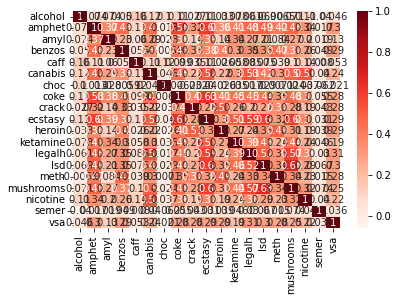

In [3]:
# Now that we have trasnformed this into a binary classification problem, we can start looking into the feature engineering of the dataset.
# We can see that we have two type of features : demographic and personnality. But before deciding which one we want to keep, we should first get a feel of the data. 

import pandas as pd
from sklearn import preprocessing
import numpy as np

demographicData = df.drop(["id","nscore","escore","oscore","ascore","cscore","impulsive","ss"], axis=1)
demographicData.to_csv("data/demographic.csv",index=False)
personnalityData = df.drop(["id","age","gender","education","country","ethnicity"], axis=1)
personnalityData.to_csv("data/personnality.csv",index=False)
allData = df.drop(["id"],axis=1)
allData.to_csv("data/allData.csv",index=False)
allData_normalized=allData
#X_normalized = preprocessing.normalize(allData["nscore","escore","oscore","ascore","cscore","impulsive","ss","age","gender","education","country","ethnicity"], norm='l2')
cols_to_norm = ["nscore","escore","oscore","ascore","cscore","impulsive","ss","age","gender","education","country","ethnicity"]
allData_normalized[cols_to_norm] = allData_normalized[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
#allData_normalized = pd.DataFrame(X_normalized,columns=list(allData.columns.values))
allData_normalized.to_csv("data/allData_normalized.csv")
allData=allData_normalized
allData.loc[(df!=0).any(axis=1)]


#Checking the correlationnbetween drugs
#Using Pearson Correlation
import matplotlib.pyplot as plt
import seaborn as sns

drugData = allData.drop(["nscore","escore","oscore","ascore","cscore","impulsive","ss","age","gender","education","country","ethnicity"],axis=1)
cor = drugData.corr()
cor.reindex(cor.mean().sort_values().index, axis=1)

sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


Tree Classifier
Best features for amphet : ['age', 'country', 'cscore', 'impulsive', 'ss']
Accuracy for amphet : 0.6540156301962088


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Best features for canabis : ['age', 'country', 'ethnicity', 'oscore', 'cscore', 'ss']
Accuracy for canabis : 0.7402740905503337


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Py

Best features for ecstasy : ['age', 'oscore', 'cscore', 'ss']
Accuracy for ecstasy : 0.6842883836810962
Best features for legalh : ['age', 'gender', 'oscore', 'cscore', 'ss']


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy for legalh : 0.7313661372365826
Best features for lsd : ['age', 'country', 'ethnicity', 'oscore', 'ss']


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy for lsd : 0.6346177711590966
Best features for mushrooms : ['age', 'country', 'oscore', 'cscore', 'ss']


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy for mushrooms : 0.730345425281664
Overall Accuracy : 0.6958179063508303


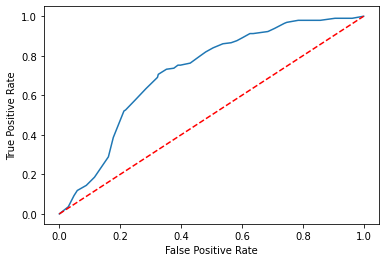

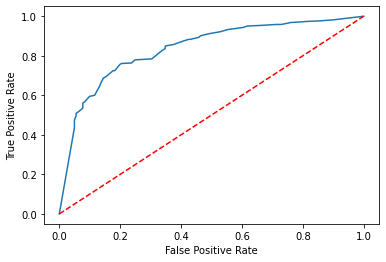

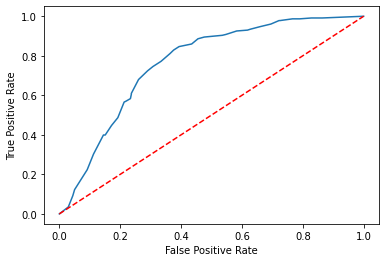

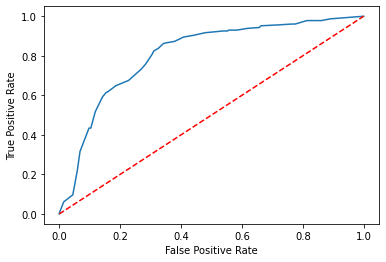

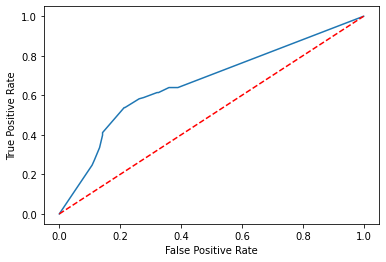

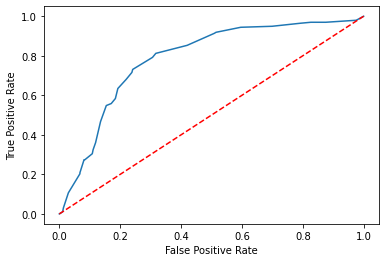

In [38]:
# DECISION TREE
import array
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score,accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFpr
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# We have 19 diffrent drugs to classify, this means that we will need to do 19 different classification
all_drugs = ["alcohol","amphet","amyl","benzos","canabis","coke","crack","ecstasy","heroin","ketamine","legalh","lsd","meth","mushrooms","nicotine","vsa","caff","choc"]
selected_drugs = ["amphet","canabis","ecstasy","legalh","lsd","mushrooms"]

#creating an array to store the results
results = pd.DataFrame(columns=["Drug","Recall","Precision","Balanced Accuracy","Selected Features"])
overall_accuracy = 0
overall_recall =0
overall_precision=0

# Name of the folder to store the results
folder_name = "tree_classifier"

# We want to see it if only the demographic data would be enough to classify the different drugs
print('\033[1m'+"Tree Classifier"+'\033[0m')

# Looping through all the drugs and doing prediction for each of them seprately 
for cl in selected_drugs:

    row = []

    # Feature selection, we are creating a testing and training set on all the features (demographic/persopnnality)
    X_train, X_test, y_train, y_test = train_test_split( allData.drop(all_drugs, axis=1),allData[cl], test_size=0.3,random_state=0)
    
    # Creating a model; based on logistic regression to select the most relevant features for this specific drug
    select = SelectFromModel(estimator=LogisticRegression())
    select.fit(X_train, y_train)
    
    # Retrieving the relevant features
    status = select.get_support()

    # Retrieving demographic and personnality data 
    features = list(allData.drop(all_drugs,axis=1).columns.values)

    # Creating a list of the selected features 
    selected_features=[]
    index = 0
    for elem in features:
        if (status[index]==True):
            selected_features.append(elem)
        index=index+1

    # Creating the the testing and training for prediction 
    X_train, X_test, y_train, y_test = train_test_split( allData[selected_features],allData[cl], test_size=0.3,random_state=0)

    #Using the tree classifier
    clf1 = tree.DecisionTreeClassifier() 

    # Using a pipeline for sclaing, feature selection and classification (using the best 5 features)
    pipe = Pipeline([('scaler', StandardScaler()),
                 ('selector', SelectKBest(mutual_info_classif, k=5)),
                 ('classifier', clf1)])

    #Defininf the search space for this pipeline 
    search_space = [{'selector__k': [1, 2, 3, 4,5]},
                {'classifier': [tree.DecisionTreeClassifier()]}]
               

    # Using cross validation and pipelines 
    clf2 = GridSearchCV(pipe, list(search_space), cv=10, verbose=0)
    
    # Fitting the data 
    clf2.fit(X_train,y_train)
    y_pred = clf2.predict(X_test)

    # Displaying the best estimator
    best_pipeline = clf2.best_estimator_
    print("Best features for "+cl+" : "+str(list(best_pipeline.feature_names_in_)))
   
    # Saving the classification report of the drug
    class_report = classification_report(y_test, y_pred,output_dict=True)
    class_report_data = pd.DataFrame(class_report).transpose()
    class_report_data.to_csv("results/"+folder_name+"/classification_report/"+cl+"_classification_report.csv")

    # Saving the confusion matrix of the drug
    color = 'black'
    matrix = plot_confusion_matrix(clf2, X_test, y_test, cmap=plt.cm.Reds)
    matrix.ax_.set_title('Confusion Matrix', color=color)
    plt.xlabel('Predicted Label', color=color)
    plt.ylabel('True Label', color=color)
    plt.gcf().axes[0].tick_params(colors=color)
    plt.gcf().axes[1].tick_params(colors=color)
    plt.savefig("results/"+folder_name+"/confusion_matrix/"+cl+"_confusion_matrix.png")
    plt.clf()

    # Computing the results
    print("Accuracy for "+cl+" : "+str(balanced_accuracy_score(y_test, y_pred)))
    overall_accuracy = overall_accuracy + balanced_accuracy_score(y_test, y_pred)
    overall_recall = overall_recall + recall_score(y_test, y_pred)
    overall_precision = overall_precision + precision_score(y_test, y_pred)
    
    # Create the ROC
    y_pred_proba = clf2.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    plt.clf()
    plt.plot(fpr,tpr)
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.savefig("results/"+folder_name+"/ROC/"+cl+"_roc.png")

    # Adding the accuracy results to the result array
    new_row = {"Drug":cl,"Precision":precision_score(y_test, y_pred, average='weighted'),"Recall":recall_score(y_test, y_pred, average='weighted'),"Balanced Accuracy":balanced_accuracy_score(y_test, y_pred),"Selected Features":str(list(best_pipeline.feature_names_in_))}
    results = results.append(new_row,ignore_index=True)

# Adding a row to the result table for overall results of all the drugs using the model
new_row = {"Drug":"All drugs","Recall":overall_recall/len(selected_drugs),"Precision":overall_precision/len(selected_drugs),"Balanced Accuracy":overall_accuracy/len(selected_drugs)}
results = results.append(new_row,ignore_index=True) 

# Saving the results to a .csv file
results.to_csv("results/"+folder_name+"/"+folder_name+"_results.csv")

# Printing overall Accuracy 
print("Overall Accuracy : "+str(overall_accuracy/len(selected_drugs)))

Random Forest Classifier
Selected features:
['age', 'education', 'country', 'ascore', 'impulsive', 'ss', 'amyl', 'benzos', 'caff', 'coke', 'ketamine', 'meth', 'semer']
Accuracy for amphet : 0.797468282414519
Selected features:
['age', 'country', 'escore', 'oscore', 'amyl', 'coke', 'nicotine']
Accuracy for canabis : 0.8228672985781991
Selected features:
['age', 'education', 'oscore', 'cscore', 'ss', 'amyl', 'caff', 'choc', 'coke', 'ketamine']
Accuracy for ecstasy : 0.8292575811133605
Selected features:
['age', 'gender', 'country', 'escore', 'oscore', 'cscore', 'ss', 'coke', 'ketamine', 'nicotine']
Accuracy for legalh : 0.8055617887481968
Selected features:
['age', 'education', 'country', 'ethnicity', 'nscore', 'oscore', 'ss', 'choc', 'coke', 'heroin', 'ketamine']
Accuracy for lsd : 0.787050175775008
Selected features:
['age', 'country', 'nscore', 'oscore', 'amyl', 'caff', 'choc', 'coke', 'ketamine']
Accuracy for mushrooms : 0.7800881953867028
        Drug    Recall  Precision  Balanced 

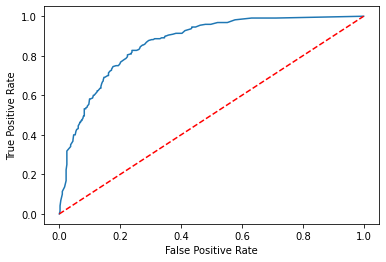

In [5]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
import array
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFpr
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score


# We have 19 diffrent drigs to classify, this means that we will need to do 19 different classification
#drugs = ["alcohol","amphet","amyl","benzos","caff","canabis","choc","coke","crack","ecstasy","heroin","ketamine","legalh","lsd","meth","mushrooms","nicotine","semer","vsa"]
drugs = ["amphet","canabis","ecstasy","legalh","lsd","mushrooms"]
#creating an array to store the results
results = pd.DataFrame(columns=["Drug","Recall","Precision","Balanced Accuracy"])
overall_accuracy = 0
overall_recall =0
overall_precision=0

# **DEMOGRAPHIC DATA**
# We want to see it if only the demographic data would be enough to classify the different drugs
print('\033[1m'+"Random Forest Classifier"+'\033[0m')
for cl in drugs:

    row = []

    X_train, X_test, y_train, y_test = train_test_split( allData.drop(drugs, axis=1),allData[cl], test_size=0.33,random_state=0)
    #We want to select only the features that are relevant for this type of drug
    
    select = SelectFromModel(estimator=LogisticRegression())
    select.fit(X_train, y_train)
    
    status = select.get_support()
    #print("Selection status: ", list(status) )


    features = list(allData.drop(drugs,axis=1).columns.values)
    #print("All features:")
    #print(features) 
  
    print("Selected features:")
    selected_features=[]
    index = 0
    for elem in features:
        if (status[index]==True):
            selected_features.append(elem)
        index=index+1
    print(selected_features)

    X_train, X_test, y_train, y_test = train_test_split( allData[selected_features],allData[cl], test_size=0.33,random_state=0)
    clf1 = RandomForestClassifier()
    clf1.fit(X_train,y_train)
    y_pred = clf1.predict(X_test)
    # select.transform(X_train) 
   # y_pred = clf1.predict(X_test)
    # #print("Prediction for "+cl)
    # #plot_confusion_matrix(clf, X_test, y_test) 
    cf_matrix = confusion_matrix(y_test, y_pred)
    matrix = pd.DataFrame(cf_matrix)
    print("Accuracy for "+cl+" : "+str(balanced_accuracy_score(y_test, y_pred)))
    overall_accuracy = overall_accuracy + balanced_accuracy_score(y_test, y_pred)
    overall_recall = overall_recall + recall_score(y_test, y_pred)
    overall_precision = overall_precision + precision_score(y_test, y_pred)
    # #saving matric to CSV
    matrix.to_csv("results/random_forest_classifier/confusion_matrix/"+cl+"_confusion_matrix.csv")
    # #create the ROC
    y_pred_proba = clf1.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    #create ROC curve
    plt.clf()
    plt.plot(fpr,tpr)
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.savefig("results/random_forest_classifier/ROC/"+cl+"_roc.png")
    
    # #Adding the accuracy results to the result array
    # #row = pd.DataFrame([cl,acc1,acc2,acc3],columns=["Drug","Demographic","Personnality","All"])
    new_row = {"Drug":cl,"Precision":precision_score(y_test, y_pred, average='weighted'),"Recall":recall_score(y_test, y_pred, average='weighted'),"Balanced Accuracy":balanced_accuracy_score(y_test, y_pred)}
    results = results.append(new_row,ignore_index=True)
    # overall_accuracy = overall_accuracy+ acc1+acc2+acc3

new_row = {"Drug":"All drugs","Recall":overall_recall/len(drugs),"Precision":overall_precision/len(drugs),"Balanced Accuracy":overall_accuracy/len(drugs)}
results = results.append(new_row,ignore_index=True) 
results.to_csv("results/random_forest_classifier/random_forest_classifier_results.csv")
print(results)
print("Overall Accuracy : "+str(overall_accuracy/len(drugs)))

SVM Classifier
Selected features:
['age', 'education', 'country', 'ascore', 'impulsive', 'ss', 'amyl', 'benzos', 'caff', 'coke', 'ketamine', 'meth', 'semer']
Accuracy for amphet : 0.8066848722762701
Selected features:
['age', 'country', 'escore', 'oscore', 'amyl', 'coke', 'nicotine']
Accuracy for canabis : 0.832345971563981
Selected features:
['age', 'education', 'oscore', 'cscore', 'ss', 'amyl', 'caff', 'choc', 'coke', 'ketamine']
Accuracy for ecstasy : 0.8282399820045632
Selected features:
['age', 'gender', 'country', 'escore', 'oscore', 'cscore', 'ss', 'coke', 'ketamine', 'nicotine']
Accuracy for legalh : 0.8079553347224449
Selected features:
['age', 'education', 'country', 'ethnicity', 'nscore', 'oscore', 'ss', 'choc', 'coke', 'heroin', 'ketamine']
Accuracy for lsd : 0.8178459571748162
Selected features:
['age', 'country', 'nscore', 'oscore', 'amyl', 'caff', 'choc', 'coke', 'ketamine']
Accuracy for mushrooms : 0.825497512437811
        Drug    Recall  Precision  Balanced Accuracy
0

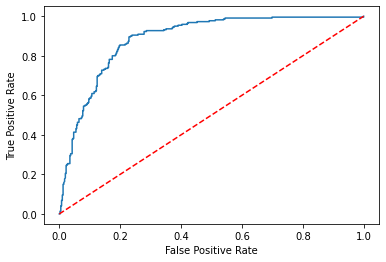

In [6]:
# SUPPORT VECTOR
from sklearn import svm
import array
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFpr
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score


# We have 19 diffrent drigs to classify, this means that we will need to do 19 different classification
#drugs = ["alcohol","amphet","amyl","benzos","caff","canabis","choc","coke","crack","ecstasy","heroin","ketamine","legalh","lsd","meth","mushrooms","nicotine","semer","vsa"]
drugs = ["amphet","canabis","ecstasy","legalh","lsd","mushrooms"]
#creating an array to store the results
results = pd.DataFrame(columns=["Drug","Recall","Precision","Balanced Accuracy"])
overall_accuracy = 0
overall_recall =0
overall_precision=0

# **DEMOGRAPHIC DATA**
# We want to see it if only the demographic data would be enough to classify the different drugs
print('\033[1m'+"SVM Classifier"+'\033[0m')
for cl in drugs:

    row = []

    X_train, X_test, y_train, y_test = train_test_split( allData.drop(drugs, axis=1),allData[cl], test_size=0.33,random_state=0)
    #We want to select only the features that are relevant for this type of drug
    
    select = SelectFromModel(estimator=LogisticRegression())
    select.fit(X_train, y_train)
    
    status = select.get_support()
    #print("Selection status: ", list(status) )


    features = list(allData.drop(drugs,axis=1).columns.values)
    #print("All features:")
    #print(features) 
  
    print("Selected features:")
    selected_features=[]
    index = 0
    for elem in features:
        if (status[index]==True):
            selected_features.append(elem)
        index=index+1
    print(selected_features)

    X_train, X_test, y_train, y_test = train_test_split( allData[selected_features],allData[cl], test_size=0.33,random_state=0)
    clf1 = svm.SVC(probability=True)
    clf1.fit(X_train,y_train)
    y_pred = clf1.predict(X_test)
    # select.transform(X_train) 
   # y_pred = clf1.predict(X_test)
    # #print("Prediction for "+cl)
    # #plot_confusion_matrix(clf, X_test, y_test) 
    cf_matrix = confusion_matrix(y_test, y_pred)
    matrix = pd.DataFrame(cf_matrix)
    print("Accuracy for "+cl+" : "+str(balanced_accuracy_score(y_test, y_pred)))
    overall_accuracy = overall_accuracy + balanced_accuracy_score(y_test, y_pred)
    overall_recall = overall_recall + recall_score(y_test, y_pred)
    overall_precision = overall_precision + precision_score(y_test, y_pred)
    # #saving matric to CSV
    matrix.to_csv("results/svm_classifier/confusion_matrix/"+cl+"_confusion_matrix.csv")
    # #create the ROC
    y_pred_proba = clf1.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    #create ROC curve
    plt.clf()
    plt.plot(fpr,tpr)
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.savefig("results/svm_classifier/ROC/"+cl+"_roc.png")
    
    # #Adding the accuracy results to the result array
    # #row = pd.DataFrame([cl,acc1,acc2,acc3],columns=["Drug","Demographic","Personnality","All"])
    new_row = {"Drug":cl,"Precision":precision_score(y_test, y_pred, average='weighted'),"Recall":recall_score(y_test, y_pred, average='weighted'),"Balanced Accuracy":balanced_accuracy_score(y_test, y_pred)}
    results = results.append(new_row,ignore_index=True)
    # overall_accuracy = overall_accuracy+ acc1+acc2+acc3

new_row = {"Drug":"All drugs","Recall":overall_recall/len(drugs),"Precision":overall_precision/len(drugs),"Balanced Accuracy":overall_accuracy/len(drugs)}
results = results.append(new_row,ignore_index=True) 
results.to_csv("results/svm_classifier/svm_classifier_results.csv")
print(results)
print("Overall Accuracy : "+str(overall_accuracy/len(drugs)))

KNN Classifier
Selected features:
['age', 'education', 'country', 'ascore', 'impulsive', 'ss', 'amyl', 'benzos', 'caff', 'coke', 'ketamine', 'meth', 'semer']
Accuracy for amphet : 0.7845479888490641
Selected features:
['age', 'country', 'escore', 'oscore', 'amyl', 'coke', 'nicotine']
Accuracy for canabis : 0.8240521327014219
Selected features:
['age', 'education', 'oscore', 'cscore', 'ss', 'amyl', 'caff', 'choc', 'coke', 'ketamine']
Accuracy for ecstasy : 0.83050012318305
Selected features:
['age', 'gender', 'country', 'escore', 'oscore', 'cscore', 'ss', 'coke', 'ketamine', 'nicotine']
Accuracy for legalh : 0.7885131164182294
Selected features:
['age', 'education', 'country', 'ethnicity', 'nscore', 'oscore', 'ss', 'choc', 'coke', 'heroin', 'ketamine']
Accuracy for lsd : 0.7889101949504634
Selected features:
['age', 'country', 'nscore', 'oscore', 'amyl', 'caff', 'choc', 'coke', 'ketamine']
Accuracy for mushrooms : 0.8040140208050656
        Drug    Recall  Precision  Balanced Accuracy
0

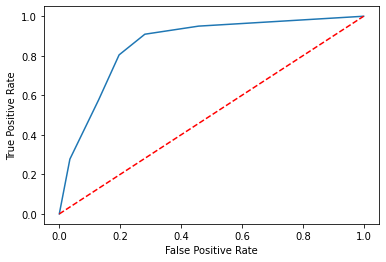

In [7]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
import array
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFpr
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score


# We have 19 diffrent drigs to classify, this means that we will need to do 19 different classification
#drugs = ["alcohol","amphet","amyl","benzos","caff","canabis","choc","coke","crack","ecstasy","heroin","ketamine","legalh","lsd","meth","mushrooms","nicotine","semer","vsa"]
drugs = ["amphet","canabis","ecstasy","legalh","lsd","mushrooms"]
#creating an array to store the results
results = pd.DataFrame(columns=["Drug","Recall","Precision","Balanced Accuracy"])
overall_accuracy = 0
overall_recall =0
overall_precision=0

# **DEMOGRAPHIC DATA**
# We want to see it if only the demographic data would be enough to classify the different drugs
print('\033[1m'+"KNN Classifier"+'\033[0m')
for cl in drugs:

    row = []

    X_train, X_test, y_train, y_test = train_test_split( allData.drop(drugs, axis=1),allData[cl], test_size=0.33,random_state=0)
    #We want to select only the features that are relevant for this type of drug
    
    select = SelectFromModel(estimator=LogisticRegression())
    select.fit(X_train, y_train)
    
    status = select.get_support()
    #print("Selection status: ", list(status) )


    features = list(allData.drop(drugs,axis=1).columns.values)
    #print("All features:")
    #print(features) 
  
    print("Selected features:")
    selected_features=[]
    index = 0
    for elem in features:
        if (status[index]==True):
            selected_features.append(elem)
        index=index+1
    print(selected_features)

    X_train, X_test, y_train, y_test = train_test_split( allData[selected_features],allData[cl], test_size=0.33,random_state=0)
    clf1 = KNeighborsClassifier()
    clf1.fit(X_train,y_train)
    y_pred = clf1.predict(X_test)
    # select.transform(X_train) 
   # y_pred = clf1.predict(X_test)
    # #print("Prediction for "+cl)
    # #plot_confusion_matrix(clf, X_test, y_test) 
    cf_matrix = confusion_matrix(y_test, y_pred)
    matrix = pd.DataFrame(cf_matrix)
    print("Accuracy for "+cl+" : "+str(balanced_accuracy_score(y_test, y_pred)))
    overall_accuracy = overall_accuracy + balanced_accuracy_score(y_test, y_pred)
    overall_recall = overall_recall + recall_score(y_test, y_pred)
    overall_precision = overall_precision + precision_score(y_test, y_pred)
    # #saving matric to CSV
    matrix.to_csv("results/knn_classifier/confusion_matrix/"+cl+"_confusion_matrix.csv")
    # #create the ROC
    y_pred_proba = clf1.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    #create ROC curve
    plt.clf()
    plt.plot(fpr,tpr)
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.savefig("results/knn_classifier/ROC/"+cl+"_roc.png")
    
    # #Adding the accuracy results to the result array
    # #row = pd.DataFrame([cl,acc1,acc2,acc3],columns=["Drug","Demographic","Personnality","All"])
    new_row = {"Drug":cl,"Precision":precision_score(y_test, y_pred, average='weighted'),"Recall":recall_score(y_test, y_pred, average='weighted'),"Balanced Accuracy":balanced_accuracy_score(y_test, y_pred)}
    results = results.append(new_row,ignore_index=True)
    # overall_accuracy = overall_accuracy+ acc1+acc2+acc3

new_row = {"Drug":"All drugs","Recall":overall_recall/len(drugs),"Precision":overall_precision/len(drugs),"Balanced Accuracy":overall_accuracy/len(drugs)}
results = results.append(new_row,ignore_index=True) 
results.to_csv("results/knn_classifier/knn_classifier_results.csv")
print(results)
print("Overall Accuracy : "+str(overall_accuracy/len(drugs)))

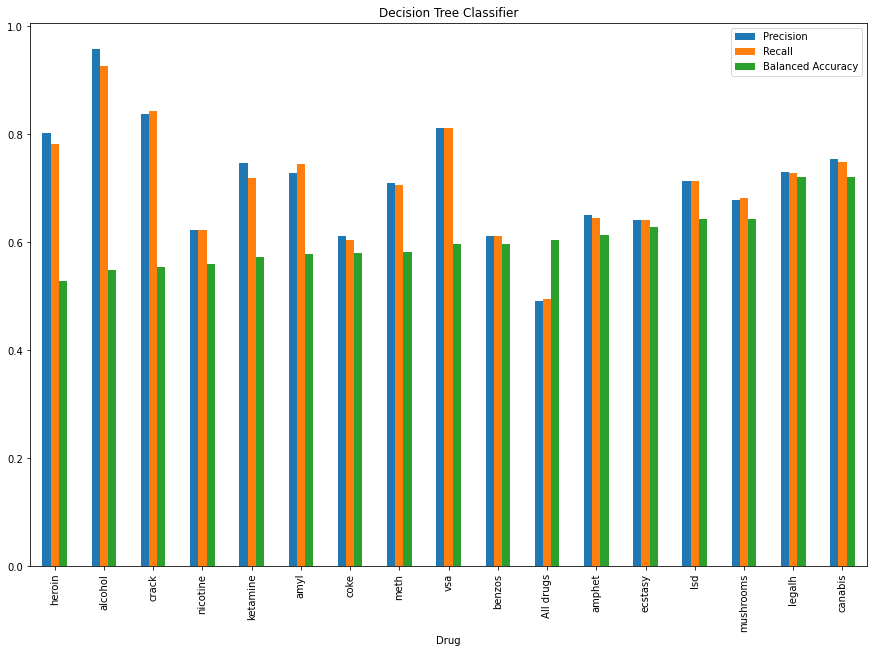

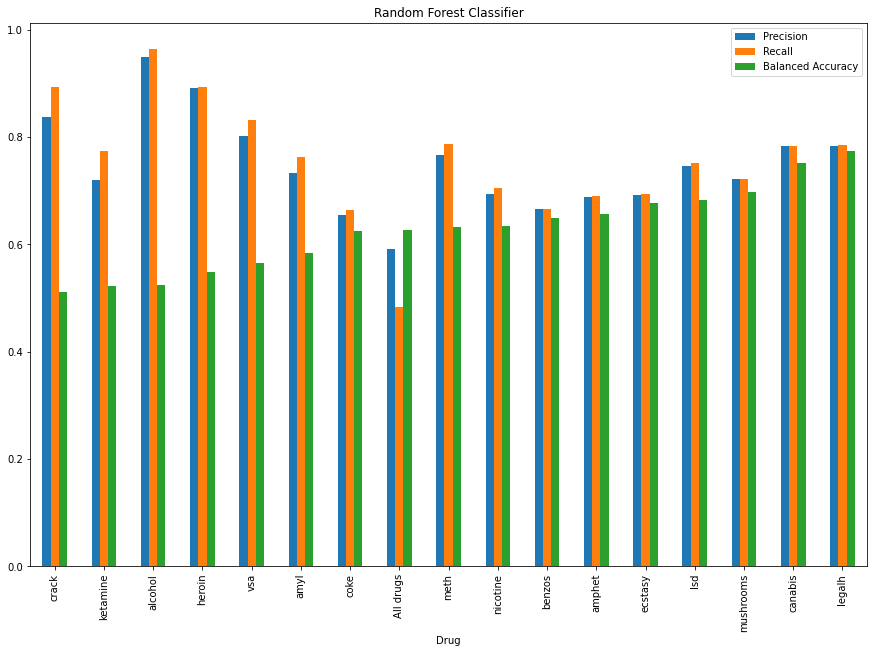

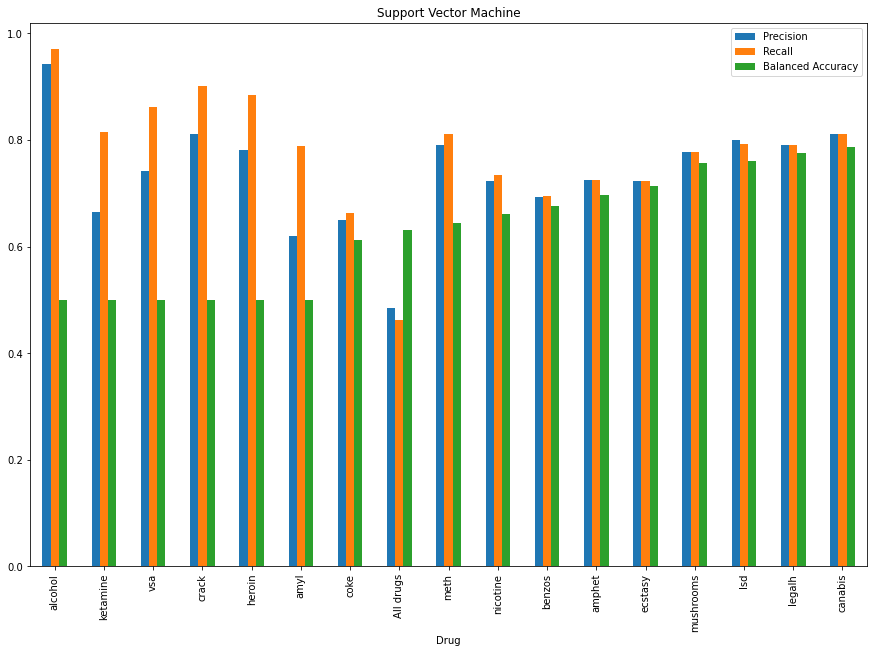

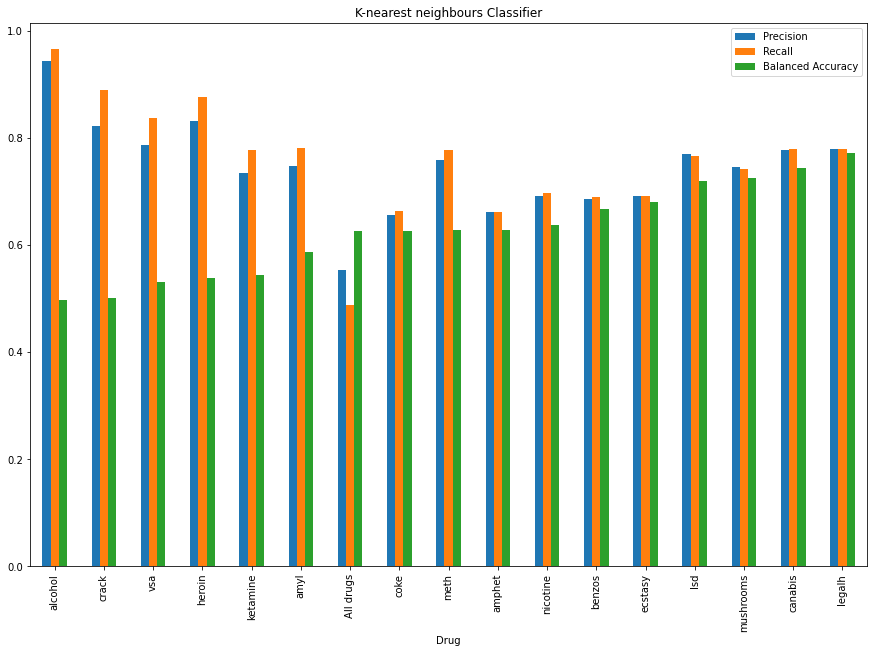

In [8]:
# We want to plot the results to visualise them 

#Decision tree 
tree_results = pd.read_csv("results/tree_classifier/tree_classifier_results.csv")
tree_results = tree_results[tree_results["Balanced Accuracy"] > 0].sort_values("Balanced Accuracy")
fig1 =tree_results.plot(x="Drug",y=["Precision","Recall","Balanced Accuracy"],kind="bar",title="Decision Tree Classifier",figsize=(15,10))
fig1.set_facecolor('xkcd:white')
pic = fig1.get_figure()

pic.savefig("results/tree_classifier/tree_results.png")
#Random Forest
random_forest_results = pd.read_csv("results/random_forest_classifier/random_forest_classifier_results.csv")
random_forest_results = random_forest_results[random_forest_results["Balanced Accuracy"] > 0].sort_values("Balanced Accuracy")
fig2 = random_forest_results.plot(x="Drug",y=["Precision","Recall","Balanced Accuracy"],kind="bar",title="Random Forest Classifier",figsize=(15,10))
pic = fig2.get_figure()
pic.savefig("results/random_forest_classifier/random_forest_results.png")

# #SVM
svm_results = pd.read_csv("results/svm_classifier/svm_classifier_results.csv")
svm_results = svm_results[svm_results["Balanced Accuracy"] > 0].sort_values("Balanced Accuracy")
fig3 = svm_results.plot(x="Drug",y=["Precision","Recall","Balanced Accuracy"],kind="bar",title="Support Vector Machine",figsize=(15,10))
pic = fig3.get_figure()
pic.savefig("results/svm_classifier/svm_results.png")
#KNN
knn_results = pd.read_csv("results/knn_classifier/knn_classifier_results.csv")
knn_results = knn_results[knn_results["Balanced Accuracy"] > 0].sort_values("Balanced Accuracy")
fig4 = knn_results.plot(x="Drug",y=["Precision","Recall","Balanced Accuracy"],kind="bar",title="K-nearest neighbours Classifier",figsize=(15,10))
pic = fig4.get_figure()
pic.savefig("results/knn_classifier/knn_results.png")